In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Participant/Train.csv")

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [6]:
df.shape

(29451, 12)

In [7]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [8]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

POSTED_BY
BHK_OR_RK
ADDRESS


In [11]:
df['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [13]:
df['BHK_OR_RK'].unique()

array(['BHK', 'RK'], dtype=object)

In [14]:
df.drop('ADDRESS',axis=1,inplace=True)

In [15]:
posted_by = pd.get_dummies(df['POSTED_BY'],drop_first=True)

In [16]:
bHK_OR_RK =  pd.get_dummies(df['BHK_OR_RK'],drop_first=True)

In [17]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [18]:
df.drop('POSTED_BY',axis=1,inplace=True)

In [19]:
df.drop('BHK_OR_RK',axis=1,inplace=True)

In [20]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [21]:
X = df.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = df['TARGET(PRICE_IN_LACS)']

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [24]:
from sklearn.metrics import mean_squared_log_error,r2_score


In [33]:
def rsmle(y_test,y_preds):
    """Calculating the root mean squared error"""
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores={"Training rmsle":rsmle(y_train,train_preds),
            "Test rmsle":rsmle(y_test,test_preds),
            "Training R^2 score":r2_score(y_train,train_preds),
            "Test R^2 score":r2_score(y_test,test_preds)
           }
    return scores

In [34]:
model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [35]:
show_scores(model)

{'Training rmsle': 0.17970871138958877,
 'Test rmsle': 0.3957997981818853,
 'Training R^2 score': 0.9730061696312581,
 'Test R^2 score': 0.7965091274197527}

In [37]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           
          }
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv =5,
                              verbose=True
                             )


Wall time: 0 ns


In [38]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [39]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 3}

In [40]:
show_scores(rs_model)

{'Training rmsle': 0.75453923065247,
 'Test rmsle': 0.7480157274827072,
 'Training R^2 score': 0.907861319319956,
 'Test R^2 score': 0.7841248245873806}

In [41]:
df_test = pd.read_csv('Participant/Test.csv')

In [42]:
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [43]:
df_test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [44]:
df_test.drop('ADDRESS',axis=1,inplace=True)

In [45]:
posted_by = pd.get_dummies(df_test['POSTED_BY'],drop_first=True)
posted_by = pd.get_dummies(df_test['POSTED_BY'],drop_first=True)

In [46]:
df_test.drop('POSTED_BY',axis=1,inplace=True)

In [47]:
df_test.drop('BHK_OR_RK',axis=1,inplace=True)

In [48]:
X_train.shape

(20615, 8)

In [49]:
df_test.shape

(68720, 8)

In [52]:
good_model = RandomForestRegressor(n_estimators= 80,
 min_samples_split=12,
 min_samples_leaf= 1,
 
 max_depth= 3)

In [54]:
good_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_split=12, n_estimators=80)

In [55]:
show_scores(good_model)

{'Training rmsle': 0.752950549801898,
 'Test rmsle': 0.7470722537669916,
 'Training R^2 score': 0.9057984665741363,
 'Test R^2 score': 0.7797957076670173}

In [56]:
good_model.feature_importances_

array([2.54340089e-04, 0.00000000e+00, 0.00000000e+00, 9.04588364e-01,
       7.95725571e-05, 7.98306852e-02, 6.16697779e-04, 1.46303403e-02])

In [58]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

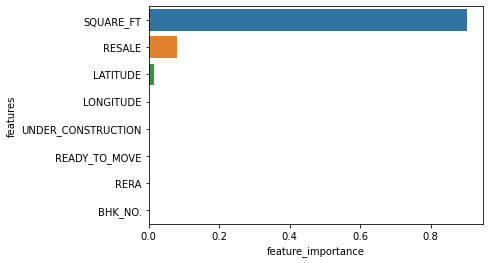

In [60]:
plot_features(X_train.columns, good_model.feature_importances_)

In [61]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [69]:
df.drop(labels=['LATITUDE','LONGITUDE','UNDER_CONSTRUCTION','READY_TO_MOVE'],axis=1,inplace=True)

In [70]:
df.head()

,RERA,BHK_NO.,SQUARE_FT,RESALE,TARGET(PRICE_IN_LACS)
0,0,2,1300.236407,1,55.0
1,0,2,1275.000000,1,51.0
2,0,2,933.159722,1,43.0
3,1,2,929.921143,1,62.5
4,0,2,999.009247,1,60.5


In [71]:
X = df.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = df['TARGET(PRICE_IN_LACS)']

In [72]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [74]:
good_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_split=12, n_estimators=80)

In [76]:
df_test.drop(labels=['LATITUDE','LONGITUDE','UNDER_CONSTRUCTION','READY_TO_MOVE'],axis=1,inplace=True)

In [80]:
predict = good_model.predict(df_test)

In [90]:
show_scores(good_model)

{'Training rmsle': 0.7568490827327338,
 'Test rmsle': 0.7549545235590209,
 'Training R^2 score': 0.9045484908043969,
 'Test R^2 score': 0.7597942410043144}

In [81]:
predict

array([  73.83184368,   73.83184368,   73.83184368, ..., 8260.95015036,
         73.83184368,  188.38411473])

In [82]:
df_preds = pd.DataFrame()

In [84]:
df_preds['TARGET(PRICE_IN_LACS)'] =predict

In [85]:
df_preds

,TARGET(PRICE_IN_LACS)
0,73.831844
1,73.831844
2,73.831844
3,73.831844
4,73.831844
...,...
68715,73.831844
68716,185.926251
68717,8260.950150
68718,73.831844


In [86]:
df_preds.to_csv('Participant/houseprice.csv',index=False)